In [304]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt


In [305]:
data = pd.read_csv("xAPI-Edu-Data (1).csv")
data.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [306]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.8+ KB


     Class     variable  value
0        M  raisedhands     15
1        M  raisedhands     20
2        L  raisedhands     10
3        L  raisedhands     30
4        M  raisedhands     40
5        M  raisedhands     42
6        L  raisedhands     35
7        M  raisedhands     50
8        M  raisedhands     12
9        M  raisedhands     70
10       H  raisedhands     50
11       M  raisedhands     19
12       L  raisedhands      5
13       L  raisedhands     20
14       H  raisedhands     62
15       M  raisedhands     30
16       M  raisedhands     36
17       M  raisedhands     55
18       M  raisedhands     69
19       H  raisedhands     70
20       M  raisedhands     60
21       M  raisedhands     10
22       M  raisedhands     15
23       L  raisedhands      2
24       L  raisedhands      0
25       L  raisedhands      8
26       M  raisedhands     19
27       L  raisedhands     25
28       M  raisedhands     75
29       M  raisedhands     30
...    ...          ...    ...
1890    

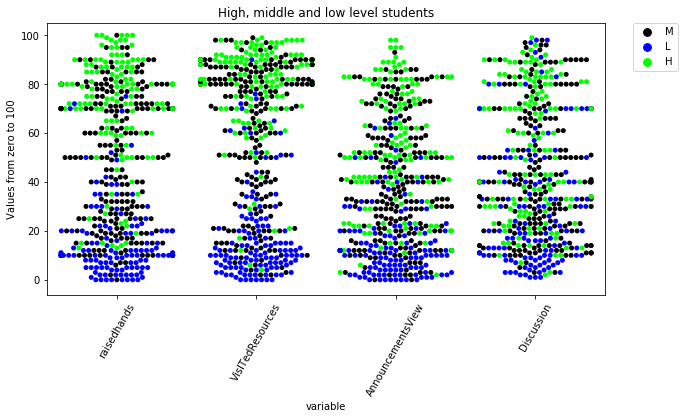

In [327]:
#raised hand and visisted source seems more correlate to the grade

melt= pd.melt(data,id_vars='Class',value_vars=['raisedhands','VisITedResources','AnnouncementsView','Discussion'])
print(melt)
g=sns.swarmplot(x='variable',y='value',hue='Class' , data=melt,palette={'H':'lime','M':'Black','L':'Blue'})
plt.ylabel('Values from zero to 100')
plt.title('High, middle and low level students')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for item in g.get_xticklabels():
    item.set_rotation(60)

In [294]:
data.corr()

,GradeID,raisedhands,VisITedResources,AnnouncementsView,Discussion,good
GradeID,1.000000,0.002821,-0.069604,0.041476,0.125901,0.037956
raisedhands,0.002821,1.000000,0.691572,0.643918,0.339386,0.495681
VisITedResources,-0.069604,0.691572,1.000000,0.594500,0.243292,0.469735
AnnouncementsView,0.041476,0.643918,0.594500,1.000000,0.417290,0.376987
Discussion,0.125901,0.339386,0.243292,0.417290,1.000000,0.243656
good,0.037956,0.495681,0.469735,0.376987,0.243656,1.000000


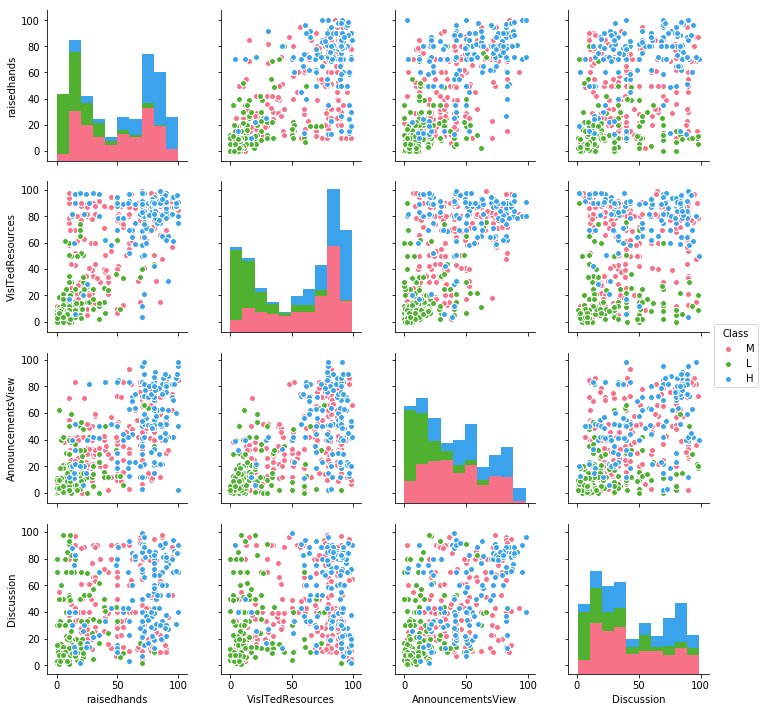

In [314]:
#it seems that there is strong correlation between raisedhands and vistTedResource
sns.pairplot(data,hue='Class',palette="husl")
plt.rcParams['figure.figsize']=(10,5)

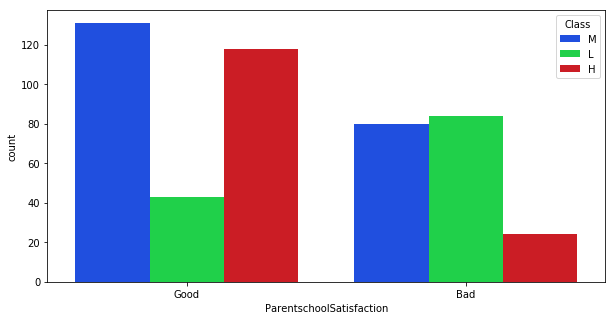

In [295]:
sns.countplot(x='ParentschoolSatisfaction',data = data, hue='Class',palette='bright')
plt.show()


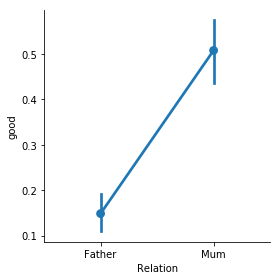

In [296]:
#mother seems have more impact on student score
data["good"] = data["Class"][(data["Class"] == "H")]

data['good'] = np.where(data['Class']=='H',1,0)

sns.factorplot('Relation','good',data=data)

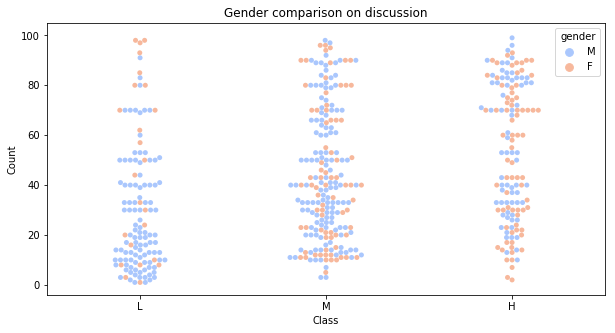

In [313]:

plot = sns.swarmplot(x='Class', y='Discussion', hue='gender', order=['L', 'M', 'H'], 
              data=data, palette='coolwarm')
plot.set(xlabel='Class', ylabel='Count', title='Gender comparison on discussion')
plt.rcParams['figure.figsize']=(10,5)
plt.show()

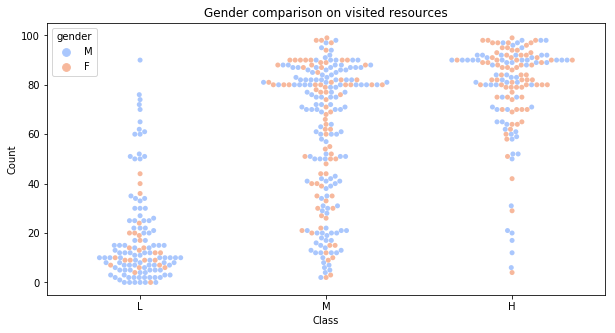

In [315]:
plot = sns.swarmplot(x='Class', y='VisITedResources', hue='gender', order=['L', 'M', 'H'], 
              data=data, palette='coolwarm')
plot.set(xlabel='Class', ylabel='Count', title='Gender comparison on visited resources')
plt.rcParams['figure.figsize']=(10,5)
plt.show()

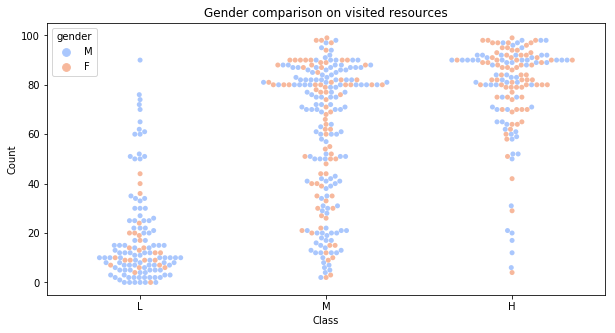

In [316]:
plot = sns.swarmplot(x='Class', y='VisITedResources', hue='gender', order=['L', 'M', 'H'], 
              data=data, palette='coolwarm')
plot.set(xlabel='Class', ylabel='Count', title='Gender comparison on visited resources')
plt.rcParams['figure.figsize']=(10,5)
plt.show()

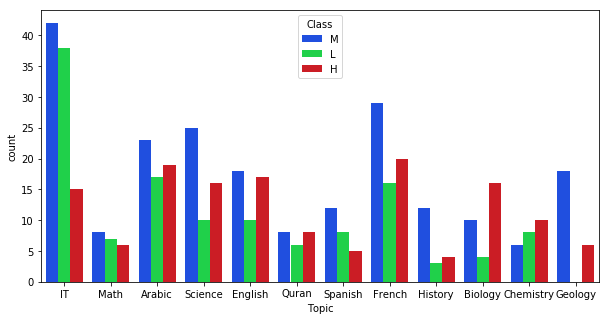

In [317]:
sns.countplot(x='Topic',data = data, hue='Class',palette='bright')
plt.show()


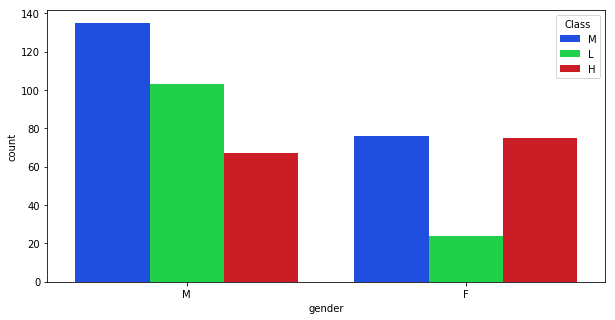

In [318]:
sns.countplot(x='gender',data = data, hue='Class',palette='bright')
plt.show()


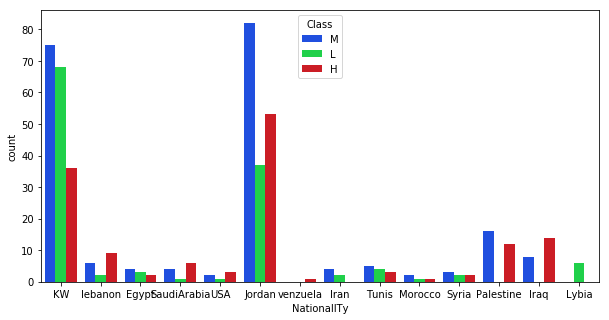

In [319]:
sns.countplot(x='NationalITy',data = data, hue='Class',palette='bright')

plt.show()

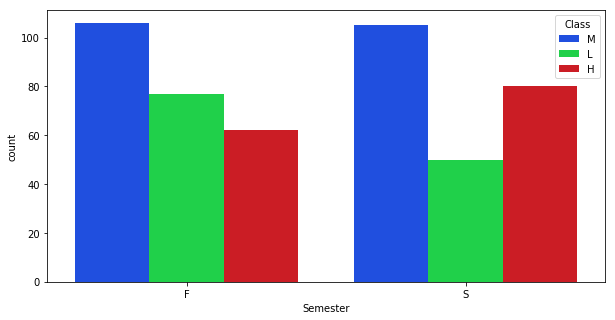

In [320]:
sns.countplot(x='Semester',data = data, hue='Class',palette='bright')

plt.show()